## Matrix Determinants

- Map Square matrix to scalar
- Enables us to determine whether matrix can be inverted
- For any matrix $X$, denoted as det($X$)
- If det($X$) == 0:
    - Matrix $X^{-1}$ cannot be computed becasue $X^{-1}$ = 1/det($X$) = 1/0
    - Matrix $X$ is sigular: It contains linearly-dependent columns
- det($X$) easiest to calculate for 2x2 matrix

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# 2x2 matrix
X = np.array([[4, 2], [-5, -3]])
det = np.linalg.det(X)
print("Determinant of X:", det)

Determinant of X: -2.0000000000000004


In [6]:
def plot_vector(vectors, colors):
    plt.figure()
    plt.axvline(x=0, color="lightgray")
    plt.axhline(y=0, color="lightgray")

    for i in range(len(vectors)):
        x = np.concatenate(([0, 0], vectors[i]))
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]], angles="xy", scale_units="xy", scale=1, color=colors[i])


def col_to_vec(matrix,col):
    return np.array(matrix[:,col]).reshape(-1)

In [7]:

N = np.array([[-4, 1], [-8, 2]])
det = np.linalg.det(N)
print("Determinant of N:", det)

## this is because the matrix is sigular(first row is linearly dependent on second - and they are parallel) cannot be inverted

Determinant of N: 0.0


In [8]:
# Ninv = np.linalg.inv(N)
# print("Inverse of N:", Ninv)

In [9]:
N = torch.tensor([[-4, 1.], [-8, 2]])
det = torch.det(N)
print("Determinant of N:", det)

Determinant of N: tensor(-0.)


## Determinants for larger matrix

Generalizing determinants

In [10]:
X = np.array([[1, 2, 4], [2, -1, 3], [0, 5, 1]])
X

array([[ 1,  2,  4],
       [ 2, -1,  3],
       [ 0,  5,  1]])

In [11]:
np.linalg.det(X)

np.float64(19.999999999999996)

Determinants and Eigenvalues

det($X$) = product of all eigenvalues of $X$

In [12]:
lambdas, vectors = np.linalg.eig(X)
print(lambdas)

[-3.25599251 -1.13863631  5.39462882]


In [13]:
np.prod(lambdas)

np.float64(19.99999999999999)

Here's |det($X$)| in numpy

In [14]:
np.abs(np.linalg.det(X))

np.float64(19.999999999999996)

Let us use a matrix B, which is composed of basis vectors, to explore the impact of applying matrices with varying |det($X$)| values:

In [15]:
B = np.array([[1, 0], [0, 1]])
B

array([[1, 0],
       [0, 1]])

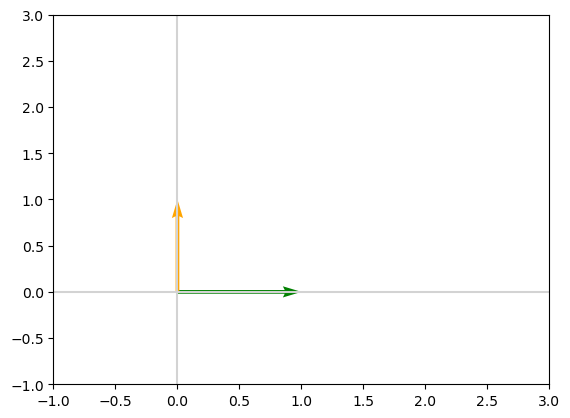

In [16]:
plot_vector([col_to_vec(B, 0), col_to_vec(B, 1)], ["green", "orange"])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)


Let us start applying the matrix $N$ to $B$, where $N$ is singular

In [17]:
N = np.array([[-4, 1], [-8, 2]])
det = np.linalg.det(N)
print("Determinant of N:", det)

Determinant of N: 0.0


In [19]:
NB = np.matmul(N, B)
NB

array([[-4,  1],
       [-8,  2]])

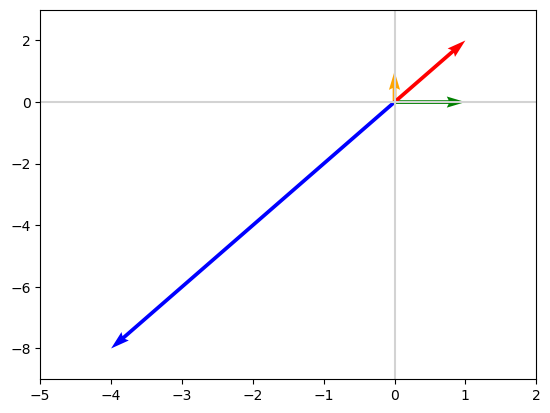

In [25]:
plot_vector([col_to_vec(B, 0), col_to_vec(B, 1), col_to_vec(NB, 0), col_to_vec(NB, 1)], ["green", "orange", "blue", "red"])
plt.xlim(-5, 2)
_ = plt.ylim(-9, 3)

In [26]:
lambdas, vectors = np.linalg.eig(N)
print(lambdas)

[-2.  0.]


If one of the eigenvalues in a matrix is zero, then the product of the eigenvalues must be zero and the determinants must also be zero

Now let us apply identity matrix $I_2$ on $B$

In [27]:
I = np.array([[1, 0], [0, 1]])
I

array([[1, 0],
       [0, 1]])

In [28]:
np.linalg.det(I)

np.float64(1.0)

In [29]:
IB = np.matmul(I, B)
IB

array([[1, 0],
       [0, 1]])

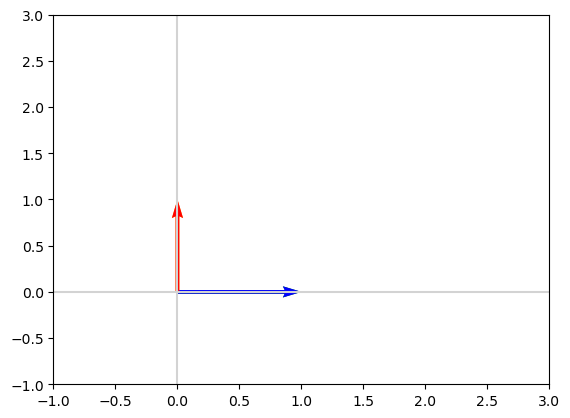

In [30]:
plot_vector([col_to_vec(B, 0), col_to_vec(B, 1), col_to_vec(IB, 0), col_to_vec(IB, 1)], ["green", "orange", "blue", "red"])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

In [32]:
lambdas, vectors = np.linalg.eig(I)
print(lambdas)

[1. 1.]


Let us now apply matrix $J$ 

In [33]:
J = np.array([[-0.5, 0], [0, 2]])
J

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

In [34]:
np.linalg.det(J)

np.float64(-1.0)

In [35]:
np.abs(np.linalg.det(J))

np.float64(1.0)

In [37]:
JB = np.matmul(J, B)
JB

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

In [38]:
lambdas, vectors = np.linalg.eig(J)
print(lambdas)

[-0.5  2. ]


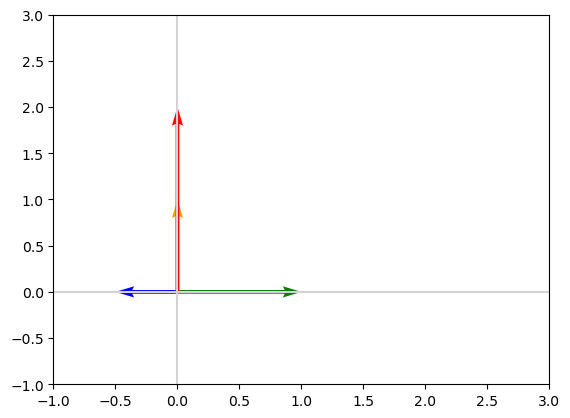

In [39]:
plot_vector([col_to_vec(B, 0), col_to_vec(B, 1), col_to_vec(JB, 0), col_to_vec(JB, 1)], ["green", "orange", "blue", "red"])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

Finally let us apply D, which scales vectors by doubling along both axis ($x$ and $y$)

In [40]:
D = I * 2
D

array([[2, 0],
       [0, 2]])

In [41]:
np.linalg.det(D)

np.float64(4.0)

In [42]:
DB = np.matmul(D, B)
DB

array([[2, 0],
       [0, 2]])

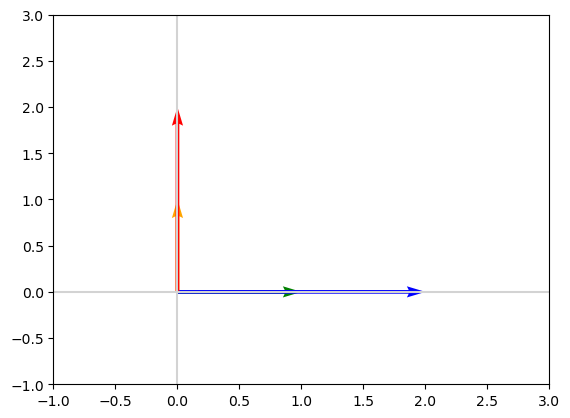

In [43]:
plot_vector([col_to_vec(B, 0), col_to_vec(B, 1), col_to_vec(DB, 0), col_to_vec(DB, 1)], ["green", "orange", "blue", "red"])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

In [44]:
lambdas, vectors = np.linalg.eig(D)
print(lambdas)

[2. 2.]
